According to the [World Health Organization](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1), Cardiovascular diseases (CVDs) are the leading global cause of death, responsible for 17.9 million deaths annually. They include coronary heart disease, strokes, and other heart and blood vessel disorders. Key risk factors include unhealthy diet, physical inactivity, tobacco and alcohol use, and air pollution. These contribute to high blood pressure, blood sugar, cholesterol, obesity, and other conditions, increasing the risk of heart attacks, strokes, and complications. Many CVD deaths, especially in those under 70, are preventable through lifestyle changes and early detection.

This study aims to leverage machine learning (ML) algorithms to predict the presence of cardiovascular diseases (CVDs) based on factors such as blood pressure, cholesterol levels, age, sex and blood glucose levels. By developing a predictive model, the study seeks to enhance early detection and support preventive healthcare interventions.

The [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) is sourced from Kaggle and contains attributes related to cardiovascular disease (CVD) risk factors. It includes demographic, lifestyle, and clinical variables that can help predict the presence of CVD.
The attributes are:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Importing the libraries and data

In [2]:
import pandas as pd
data = pd.read_csv("heart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

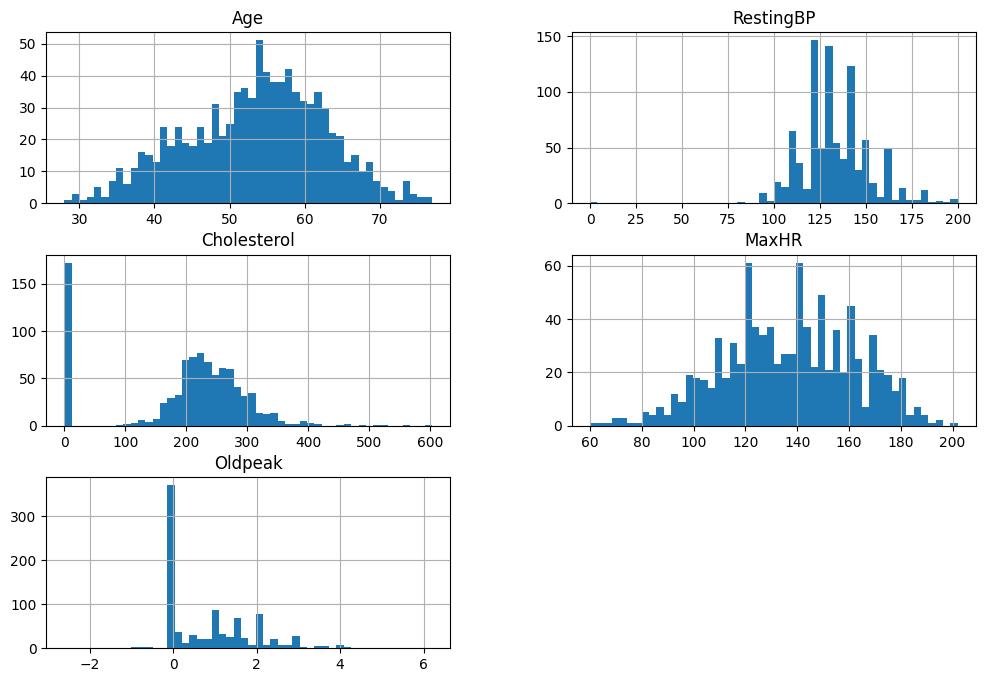

In [6]:
data.hist(column=['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], bins=50, figsize=(12,8))
plt.show()

## Exploring and visualizing data to gain insights

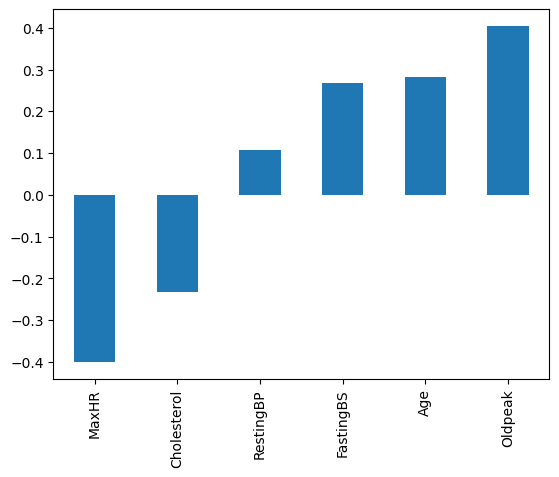

In [7]:
data.corr(numeric_only=True)['HeartDisease'][:-1].sort_values().plot(kind='bar')
plt.show()

From the above visualization it looks like there is a 
* Moderate Positive Correlation Between Heart Disease and Oldpeak (ST Depression)

A moderate positive correlation means that as Oldpeak (ST depression induced by exercise relative to rest) increases, the likelihood of heart disease also tends to increase.
This makes sense clinically because a higher ST depression often indicates myocardial ischemia (reduced blood flow to the heart), which is a risk factor for heart disease.

* Moderate Negative Correlation Between Heart Disease and Maximum Heart Rate (Thalach)

A moderate negative correlation means that as maximum heart rate (Thalach) increases, the likelihood of heart disease tends to decrease.
This aligns with medical findings, as people with heart disease often have a lower maximum heart rate due to reduced cardiovascular efficiency.

The correlation between the target variables and dependent variables can also be represented in the form of a heatmap

<Axes: >

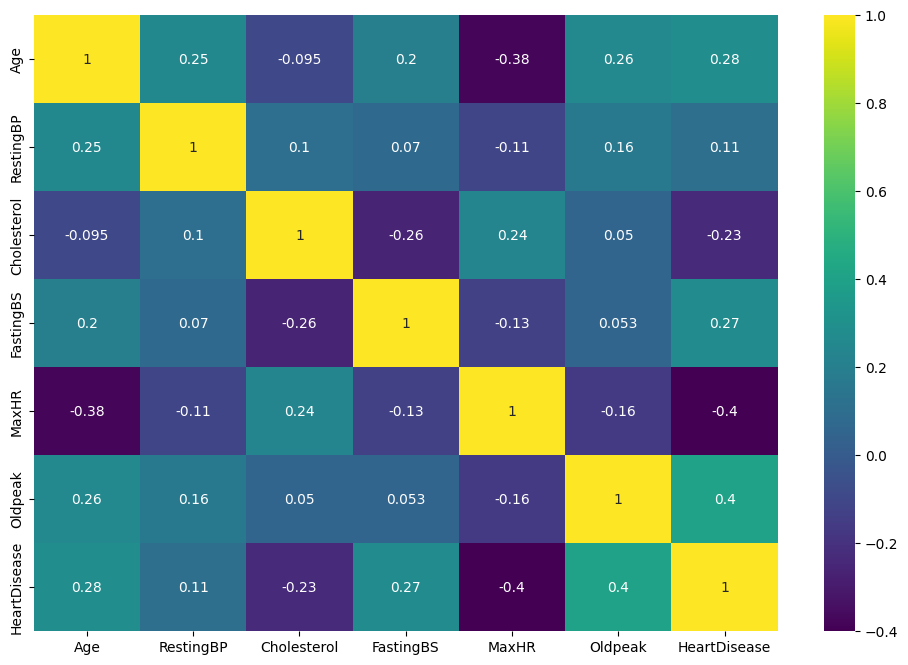

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis')

**Distribution of heart disease with respect to males and females**



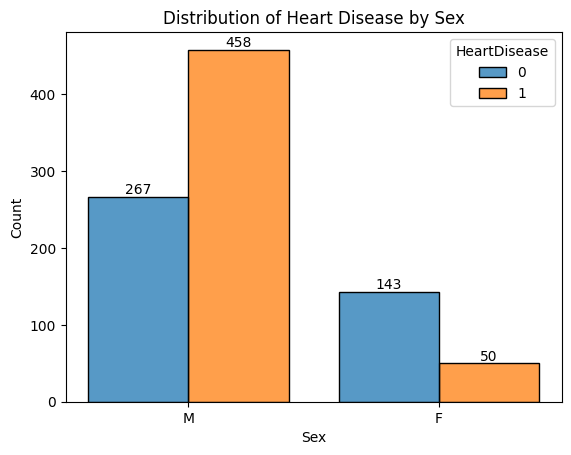

In [9]:
ax = sns.histplot(data=data, x='Sex', hue='HeartDisease', multiple='dodge', shrink=0.8, stat='count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at top of bar
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Heart Disease by Sex")
plt.show()

There are more number of males than females in the dataset (There are more number of males with heart disease than males without heart disease)

The relationships between **age, resting blood pressure, cholesterol, maximum heart rate** and **old peak** is visualized using a scatterplot matrix.

A scatterplot matrix is a grid of scatter plots that shows pairwise relationships between multiple numerical variables in a dataset. It helps visualize correlations, patterns, and potential outliers between variables.




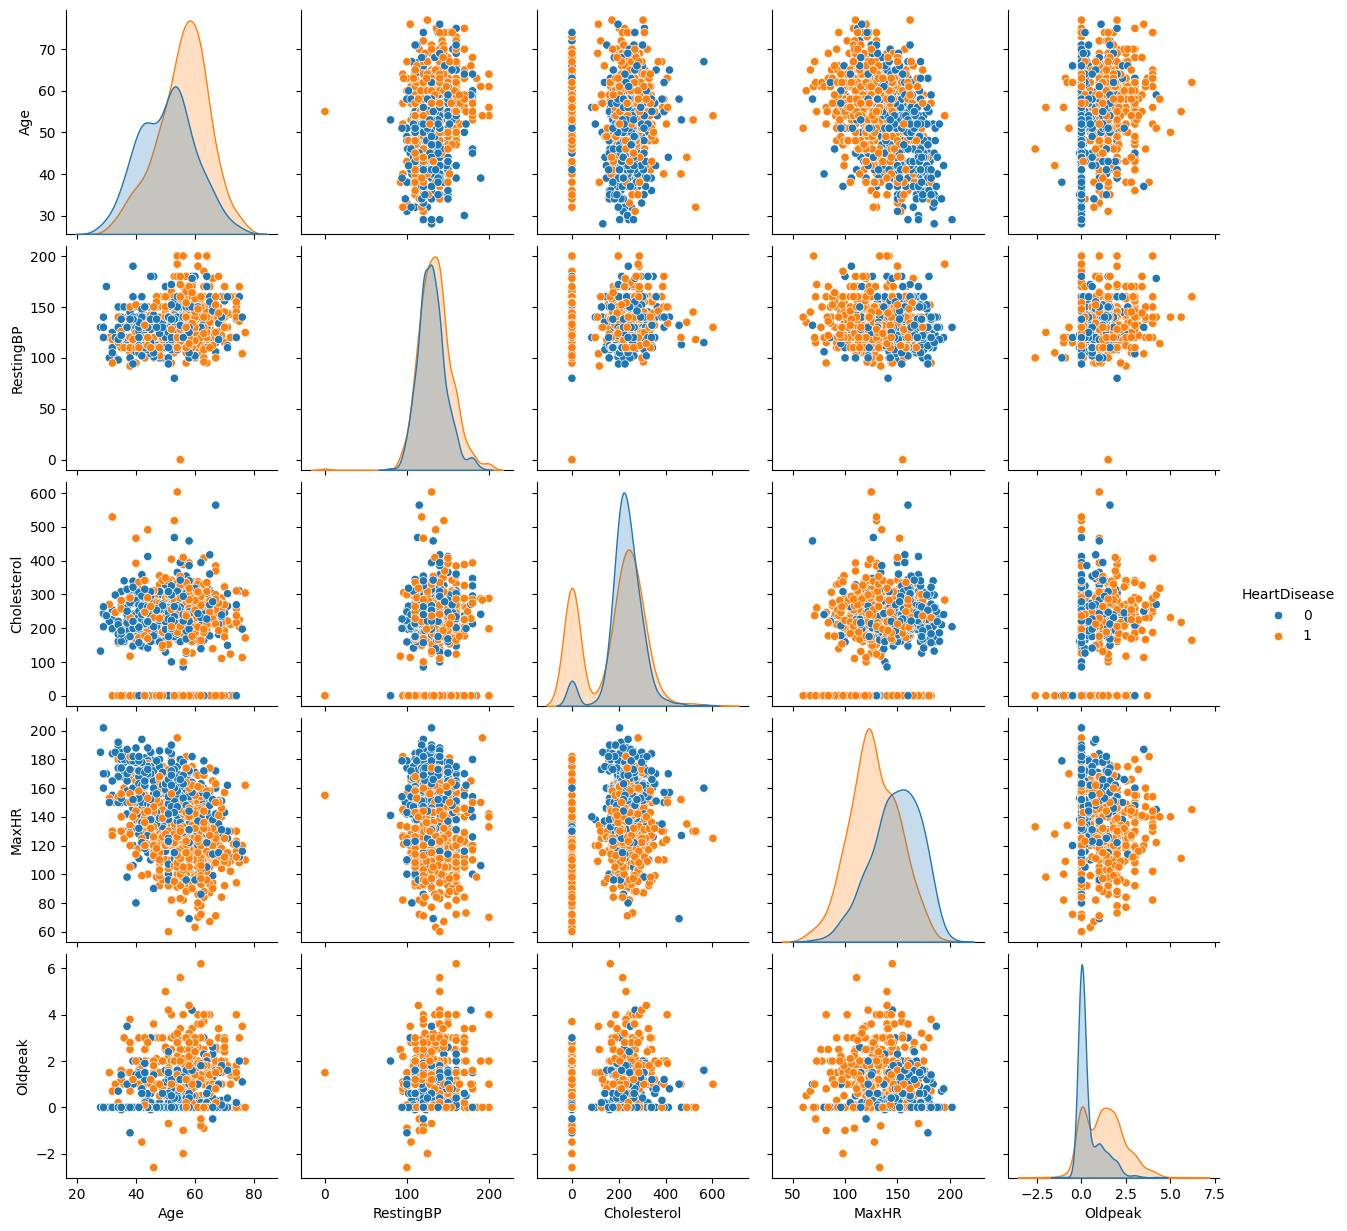

In [10]:
sns.pairplot(data=data, vars=['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], hue='HeartDisease')
plt.show()

**Insights from the scatterplot matrix**

1. Maximum heart rate decreases with age
2. There are a number of relationships where the cholesterol is zero but there is a presence of heart disease. This needs to be investigated.



**Distribution of RestingBP**

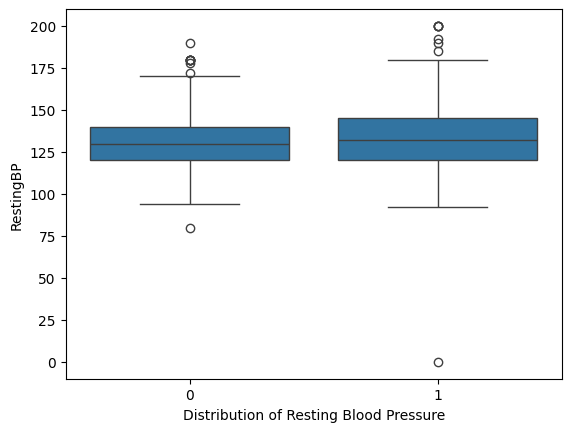

In [11]:
sns.boxplot(data=data, x='HeartDisease', y='RestingBP')
plt.xlabel('Distribution of Resting Blood Pressure')
plt.show()

**Distribution of Cholesterol**

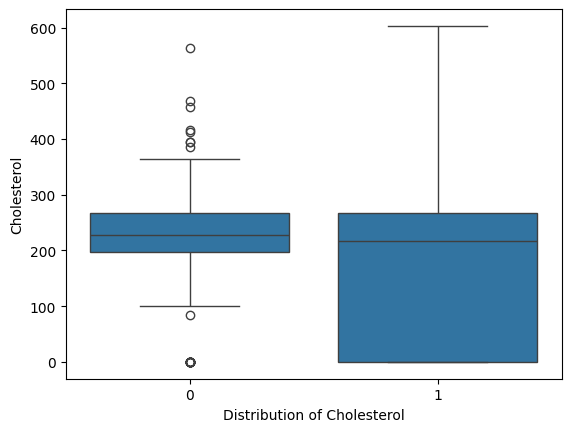

In [12]:
sns.boxplot(data=data, x='HeartDisease', y='Cholesterol')
plt.xlabel('Distribution of Cholesterol')
plt.show()

**Distribution of Maximum Heart Rate**

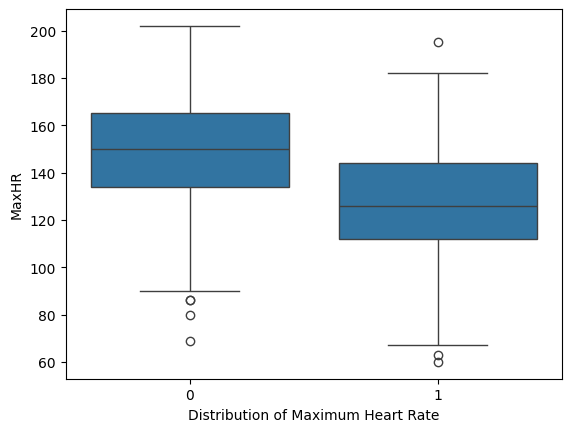

In [13]:
sns.boxplot(data=data, x='HeartDisease', y='MaxHR')
plt.xlabel('Distribution of Maximum Heart Rate')
plt.show()

**Distribution of Old Peak**

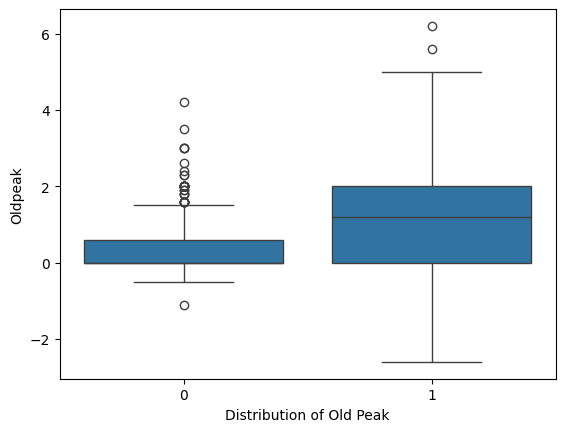

In [14]:
sns.boxplot(data=data, x='HeartDisease', y='Oldpeak')
plt.xlabel('Distribution of Old Peak')
plt.show()

Distributions of the variables RestingBP, Cholesterol, MaxHR and Oldpeak show the presence of outliers

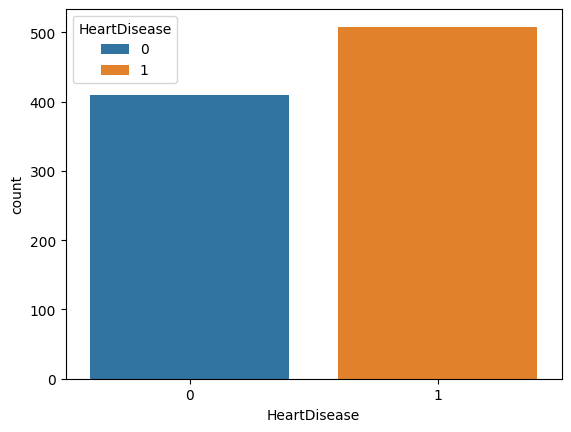

In [15]:
sns.countplot(data=data, x='HeartDisease', hue='HeartDisease')
plt.show()

**Visualizing categorical variables**

In [16]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Comparing the frequency of each type of chest pain

In [17]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

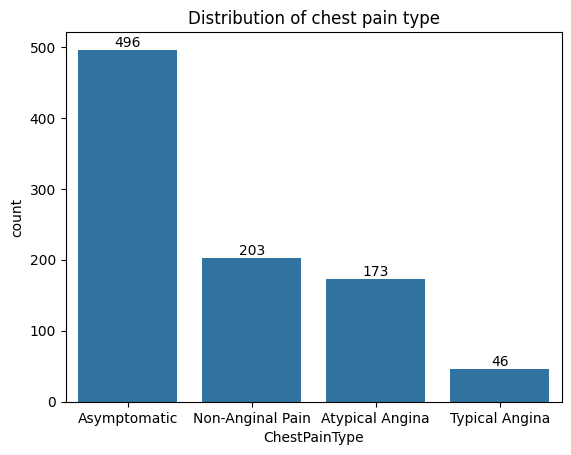

In [18]:
data['ChestPainType'] = data['ChestPainType'].replace({
    'ASY': 'Asymptomatic',
    'ATA': 'Atypical Angina',
    'NAP': 'Non-Anginal Pain',
    'TA': 'Typical Angina'
})


ax2 = sns.countplot(data=data.sort_values('ChestPainType'), x='ChestPainType', order=data['ChestPainType'].value_counts().index )
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position data label at top of bar
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of chest pain type")
plt.show()


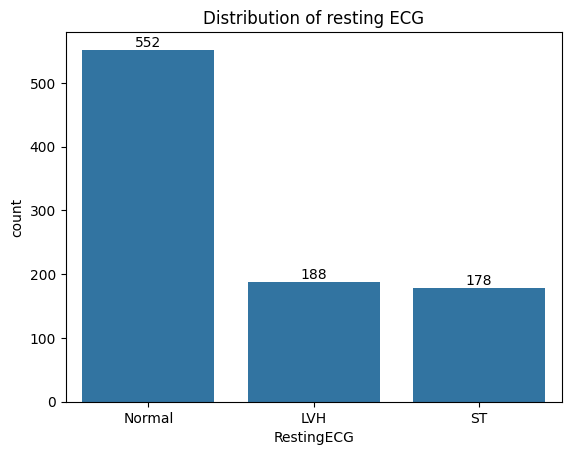

In [19]:
ax3 = sns.countplot(data=data.sort_values('RestingECG'), x='RestingECG', order=data['RestingECG'].value_counts().index)
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position data label at top of bar
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution of resting ECG")
plt.show()

## Splitting the dataset into Train and Test sets

In [140]:
X = data.drop('HeartDisease', axis=1)
y = data.iloc[:, -1]

In [141]:
# print(type(X))

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.20, random_state=42)

## Preparing the data

### Handling categorical features

In [112]:
# cat_vars = data.select_dtypes(include=['object']).columns.to_list()
# num_vars = data.select_dtypes(exclude=['object']).columns.to_list()

# print(data.columns.to_list())

# print(num_vars)

# for col in cat_vars:
#     print(data[col].value_counts())

In [113]:
# X_train_tree

In [114]:
cat_vars = X_train_tree.select_dtypes(include=['object']).columns.to_list()
num_vars = X_train_tree.select_dtypes(exclude=['object']).columns.to_list()

In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer(transformers=[('num', 'passthrough', num_vars),
                                     ('cat', OneHotEncoder(), cat_vars)])
X_train_tree = np.array(ct.fit_transform(X_train_tree))

# print(ct.feature_names_in_)

encoded_feature_names = ct.transformers_[1][1].get_feature_names_out()
# print(encoded_feature_names)

features = num_vars + list(encoded_feature_names)
print(features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_Asymptomatic', 'ChestPainType_Atypical Angina', 'ChestPainType_Non-Anginal Pain', 'ChestPainType_Typical Angina', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [116]:
# X_train_tree.shape

## Selecting and training models

## Decision Trees

Some advantages of [Decision Trees](https://scikit-learn.org/stable/modules/tree.html) are:

* Simple to understand and to interpret. 
* Trees can be visualized.
* Requires little data preparation.
* Able to handle both numerical and categorical data.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic.




In [117]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=5)
d_tree.fit(X_train_tree, y_train_tree)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

#### Visualizing the model

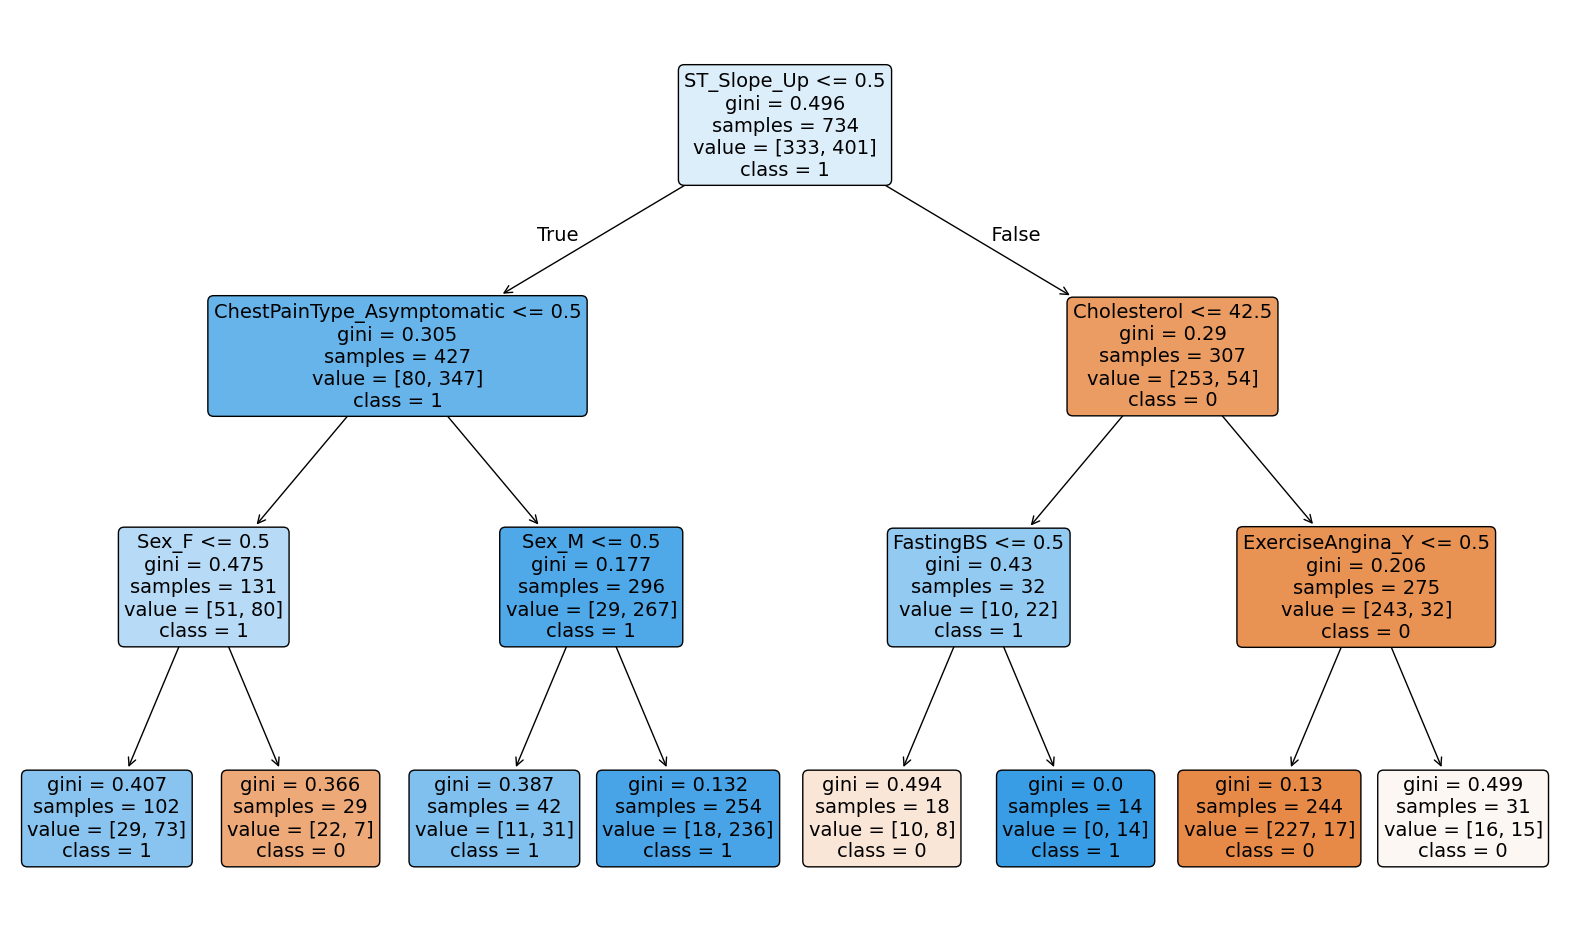

In [118]:
from sklearn.tree import plot_tree

# Set the size of the tree visual to be 12 by 12 inches
plt.figure(figsize=(20,12))

# Create a visual representions of the tree
plot_1 = plot_tree(d_tree, feature_names = features, fontsize = 14,
                   class_names = ['0','1'], filled = True, rounded=True )

**Preparing the test data - applying OneHotEncoding**

In [119]:
X_test_tree = np.array(ct.fit_transform(X_test_tree))

**Making predictions**

In [120]:
y_tree_pred = d_tree.predict(X_test_tree)

**Evaluating model performance**

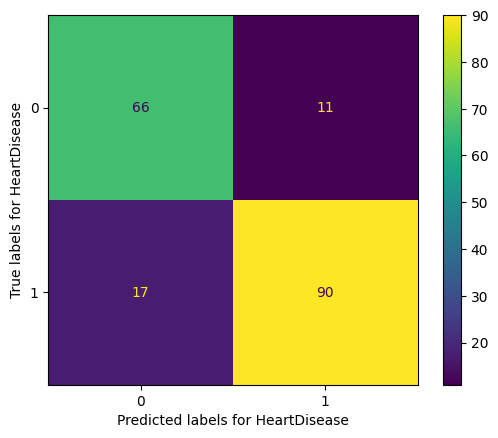

The precision is 0.89109 and the recall is 0.84112


In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score

cm = confusion_matrix(y_test_tree, y_tree_pred)
# print(cm)

cmd = ConfusionMatrixDisplay(cm, display_labels=(0,1))
cmd.plot()
plt.xlabel('Predicted labels for HeartDisease')
plt.ylabel('True labels for HeartDisease')
plt.show()

prec = precision_score(y_test_tree, y_tree_pred)
rec = recall_score(y_test_tree, y_tree_pred)

print(f'The precision is {round(prec,5)} and the recall is {round(rec,5)}')

## Random Forest

A random forest is a powerful machine learning algorithm that combines multiple decision trees to improve accuracy and robustness. Each tree is trained on a different subset of the training data, and the final prediction is determined by majority voting among the trees. This ensemble approach reduces overfitting and enhances model performance.

Some of the advantages of [Random Forest](https://www.coursera.org/articles/advantages-and-disadvantages-of-random-forest) are:

1. Can be used for both classification and regression tasks
2. Works with missing data
3. Reduces the risk of overfitting
4. Estimates feature importance

Drawbacks are:

1. Larger forests may increase runtime
2. They are complex than a single decision tree which makes them harder to interpret and explain


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, min_samples_leaf=5)
rf_clf.fit(X_train_tree, y_train_tree)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=500)

**Making predictions**

In [102]:
y_rf_pred = rf_clf.predict(X_test_tree)

**Evaluating model performance**

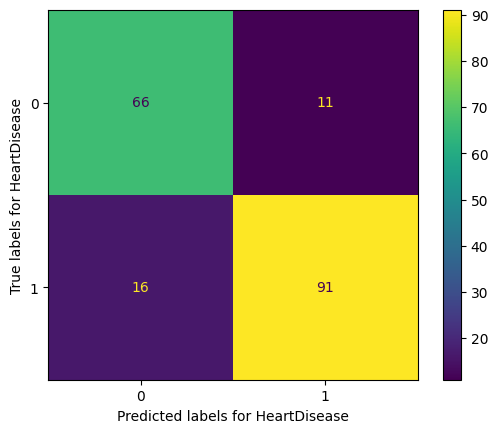

The precision is 0.89216 and the recall is 0.85047


In [103]:
cm_rf = confusion_matrix(y_test_tree, y_rf_pred)
# print(cm)

cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=(0,1))
cmd_rf.plot()
plt.xlabel('Predicted labels for HeartDisease')
plt.ylabel('True labels for HeartDisease')
plt.show()

prec_rf = precision_score(y_test_tree, y_rf_pred)
rec_rf = recall_score(y_test_tree, y_rf_pred)

print(f'The precision is {round(prec_rf,5)} and the recall is {round(rec_rf,5)}')

**Measuring the relative importance of each feature**

In [104]:
for name, score in zip(features, rf_clf.feature_importances_):
    print(name, round(score, 2))

Age 0.02
RestingBP 0.01
Cholesterol 0.04
FastingBS 0.01
MaxHR 0.04
Oldpeak 0.07
Sex_F 0.02
Sex_M 0.02
ChestPainType_Asymptomatic 0.1
ChestPainType_Atypical Angina 0.03
ChestPainType_Non-Anginal Pain 0.0
ChestPainType_Typical Angina 0.0
RestingECG_LVH 0.0
RestingECG_Normal 0.0
RestingECG_ST 0.0
ExerciseAngina_N 0.12
ExerciseAngina_Y 0.11
ST_Slope_Down 0.0
ST_Slope_Flat 0.16
ST_Slope_Up 0.24


**It seems the most important features are ST_Slope_Up (24%), ST_Slope_Flat (16%), ExerciseAngina_N(12%) and ExerciseAngina_Y(11%)**

**The improvement from the Decision Tree to the Random Forest is slight but expected. Random Forest generally enhances stability and generalization by reducing overfitting compared to a single Decision Tree.**

## Logistic regression

Preparing the training data for logistic regression. 
Unlike Decision Trees and Random Forests, Logistic Regression requires feature scaling and proper encoding to prevent multicollinearity

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

ct_2 = ColumnTransformer([
    ('num', StandardScaler(), num_vars),    # Standard Scaling for numerical features
    ('cat', OneHotEncoder(drop='first'), cat_vars)  # One-Hot Encoding for categorical features
])

X_train = np.array(ct_2.fit_transform(X_train))

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

**Making predictions**

In [145]:
X_test = ct_2.transform(X_test)

y_log_pred = log_clf.predict(X_test)

**Evaluating model performance**

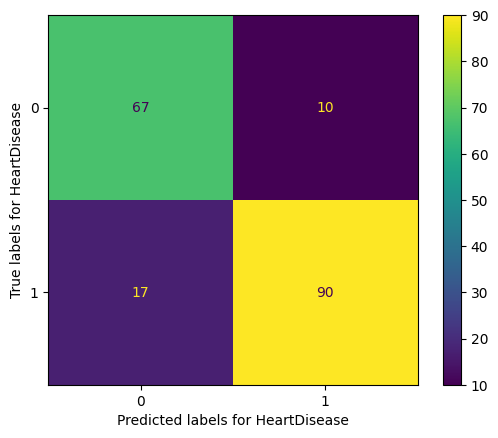

The precision is 0.9 and the recall is 0.84112


In [146]:
cm_log = confusion_matrix(y_test_tree, y_log_pred)
# print(cm)

cmd_log = ConfusionMatrixDisplay(cm_log, display_labels=(0,1))
cmd_log.plot()
plt.xlabel('Predicted labels for HeartDisease')
plt.ylabel('True labels for HeartDisease')
plt.show()

prec_log = precision_score(y_test_tree, y_log_pred)
rec_log = recall_score(y_test_tree, y_log_pred)

print(f'The precision is {round(prec_log,5)} and the recall is {round(rec_log,5)}')

**Conclusion**
Three machine learning models—Logistic Regression, Decision Tree, and Random Forest—were built and evaluated using precision and recall as key performance metrics.

* Logistic Regression achieved a precision of 0.90000 and a recall of 0.84112. 
* Decision Tree performed similarly to Logistic Regression, with a precision of 0.89109 and recall of 0.84112, indicating that it captures patterns in the data similarly but doesn’t provide significant improvement.
* Random Forest outperformed both models, achieving the highest precision (0.89216) and recall (0.85047). The ensemble approach of combining multiple decision trees resulted in better generalization, leading to a more balanced trade-off between precision and recall.

Key Insights
* Random Forest provided the best performance, offering a slight but meaningful improvement in recall while maintaining high precision.
* Logistic Regression remains a strong choice due to its interpretability and competitive precision.
* Decision Tree did not provide a substantial advantage over Logistic Regression, suggesting that a single tree may not be sufficient for optimal performance.